<a href="https://colab.research.google.com/github/siddh1990/Kaggle_Titanic/blob/main/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/train.csv")

In [3]:
test=pd.read_csv("/content/test.csv")

In [4]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=data.drop("Transported",axis=1)
y=data["Transported"]

In [7]:
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

In [9]:
X_train.isna().sum()

PassengerId       0
HomePlanet      149
CryoSleep       147
Cabin           138
Destination     139
Age             123
VIP             144
RoomService     129
FoodCourt       134
ShoppingMall    133
Spa             128
VRDeck          133
Name            144
dtype: int64

In [10]:
X_train.select_dtypes(include="O").columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [11]:
X_train.select_dtypes(exclude="O").columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

<ipython-input-12-fd761c34f62c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(),cmap="crest",annot=True)


<Axes: >

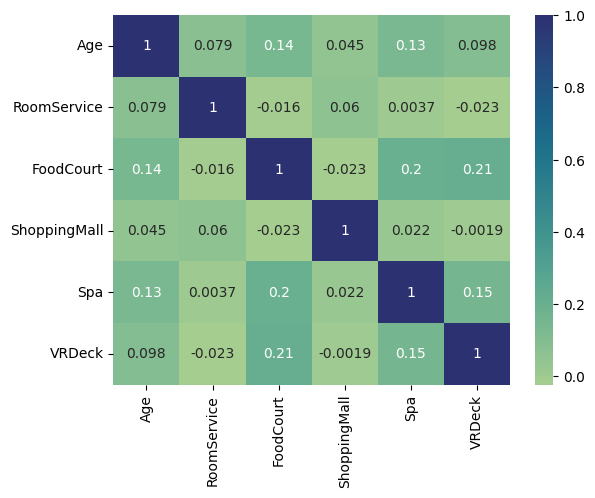

In [12]:
sns.heatmap(X_train.corr(),cmap="crest",annot=True)

In [13]:
def preprocess(X):
  X[["group","number"]]=X["PassengerId"].str.split("_",n=-1,expand=True)
  X=X.drop("PassengerId",axis=1)
  X[["deck","num","side"]]=X["Cabin"].str.split("/",n=-1,expand=True)
  X=X.drop("Cabin",axis=1)
  X=X.drop("Name",axis=1)
  from sklearn.impute import SimpleImputer
  imp=SimpleImputer(missing_values=pd.NA,strategy="constant",fill_value=0)
  for i in ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]:
    imp.fit(X[[i]])
    X[i]=imp.transform(X[[i]])
  X.loc[X["deck"].isin(["A","B","C","T"]),"HomePlanet"]="Europa"
  X.loc[(X["deck"]=="G"),"HomePlanet"]="Earth"
  cat_col=X.select_dtypes(include="O").columns
  for i in cat_col:
    imp2=SimpleImputer(missing_values=pd.NA,strategy="most_frequent")
    imp2.fit(X[[i]])
    X[i]=imp2.transform(X[[i]])
  imp3=SimpleImputer(missing_values=pd.NA,strategy="median")
  imp3.fit(X[["Age"]])
  X["Age"]=imp3.transform(X[["Age"]])
  X[["num","group","number"]]=X[["num","group","number"]].astype("int64")
  return X


In [14]:
X_train_2=X_train.copy()

In [15]:
X_train_2=preprocess(X_train_2)

In [16]:
X_train_2

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,number,deck,num,side
3395,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,3652,1,G,591,S
7906,Europa,False,55 Cancri e,32.0,False,0.0,2154.0,0.0,9655.0,859.0,8449,1,C,317,S
1760,Europa,False,TRAPPIST-1e,31.0,False,0.0,1983.0,0.0,172.0,52.0,1871,1,C,70,S
1704,Earth,True,PSO J318.5-22,25.0,False,0.0,0.0,0.0,0.0,0.0,1811,1,G,285,S
8025,Europa,False,55 Cancri e,26.0,False,6.0,728.0,0.0,1273.0,1116.0,8589,1,D,267,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,Europa,False,PSO J318.5-22,62.0,True,0.0,4513.0,0.0,85.0,1437.0,3134,1,C,119,S
4406,Earth,False,TRAPPIST-1e,38.0,False,183.0,203.0,0.0,110.0,374.0,4678,1,F,951,P
2658,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,2846,1,G,452,S
5312,Earth,True,55 Cancri e,35.0,False,0.0,0.0,0.0,0.0,0.0,5679,2,G,920,S


In [17]:
cat_col=X_train_2.select_dtypes(include="O").columns

In [18]:
num_col=X_train_2.select_dtypes(exclude="O").columns

In [19]:
X_train_2.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
group           0
number          0
deck            0
num             0
side            0
dtype: int64

In [20]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
Ord=OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
Label=LabelEncoder()

In [21]:
X_train_2[cat_col]=Ord.fit_transform(X_train_2[cat_col])

In [22]:
y_train=Label.fit_transform(y_train)

In [23]:
X_train_2.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,number,deck,num,side
3395,0.0,1.0,2.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,3652,1,6.0,591,1.0
7906,1.0,0.0,0.0,32.0,0.0,0.0,2154.0,0.0,9655.0,859.0,8449,1,2.0,317,1.0
1760,1.0,0.0,2.0,31.0,0.0,0.0,1983.0,0.0,172.0,52.0,1871,1,2.0,70,1.0
1704,0.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,1811,1,6.0,285,1.0
8025,1.0,0.0,0.0,26.0,0.0,6.0,728.0,0.0,1273.0,1116.0,8589,1,3.0,267,0.0


In [24]:
y_train

array([0, 0, 1, ..., 1, 1, 1])

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
%pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.3 MB/s eta 0:00:00


In [27]:
import numpy as np

In [51]:
import xgboost as xgb
def objective_dt1(trial, X, y):

  # Now, define all the hyperparams we want to vary, and what values they are allowed
  # to take.
  #
  # Each trial, optuna will automatically choose values for each hyperparam.
  hyper_params = {
        "objective":'binary:logistic',
        "n_estimators":1500,
        "max_depth":trial.suggest_int("max_depth",0,100),
        "max_bin":trial.suggest_int("max_bin",10,500),
        "gamma":trial.suggest_float("gamma",0,100),
        "min_child_weight":trial.suggest_float("min_child_weight",0,100),
        'lambda': trial.suggest_float('lambda', 0, 100),
        'alpha': trial.suggest_float('alpha', 0, 100 ),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0, 1.0),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01,0.1),
        "subsample":trial.suggest_float('subsample', 0, 1.0),
        "grow_policy":trial.suggest_categorical("grow_policy",["depthwise","lossguide"]),
        "max_delta_step":trial.suggest_float('max_delta_step', 0, 100 ),
        #"max_leaves":trial.suggest_int("max_leaves",0,100,step=1),
        "random_state": 70,

  }


  # Use the hyperparams that optuna has chosen for this trial to create a DecisionTreeClassifier
  clf_xgb = xgb.XGBClassifier(**hyper_params)

  # Run CV to see how well these hyper_params do
  cv_scores = cross_val_score(clf_xgb, X, y, cv=5, scoring="accuracy")
  score = np.mean(cv_scores)

  # Whatever we return here tells optuna how well these parameters did
  return score

In [321]:
study1 = optuna.create_study(direction="maximize")
study1.optimize(lambda trial: objective_dt1(trial, X_train_2,y_train), n_trials=100,  gc_after_trial=True)

[I 2024-01-21 05:23:35,431] A new study created in memory with name: no-name-24483ef4-4ebe-42aa-9125-6a780b6ecda8
[I 2024-01-21 05:23:38,454] Trial 0 finished with value: 0.7375513557929334 and parameters: {'max_depth': 61, 'max_bin': 481, 'gamma': 84.73093602673607, 'min_child_weight': 37.68580095878802, 'lambda': 49.52578182988985, 'alpha': 86.26385411523188, 'colsample_bytree': 0.017198452336793735, 'colsample_bylevel': 0.09999266230106152, 'colsample_bynode': 0.9692423722232462, 'learning_rate': 0.06265306045417102, 'subsample': 0.7099638777998043, 'grow_policy': 'depthwise', 'max_delta_step': 18.484370767243185}. Best is trial 0 with value: 0.7375513557929334.
[I 2024-01-21 05:23:42,710] Trial 1 finished with value: 0.7382087099424814 and parameters: {'max_depth': 100, 'max_bin': 129, 'gamma': 34.427275032121685, 'min_child_weight': 74.78508922976044, 'lambda': 98.19701153968552, 'alpha': 25.906981202617562, 'colsample_bytree': 0.9607640861151318, 'colsample_bylevel': 0.2024225129

In [322]:
study1.best_params

{'max_depth': 90,
 'max_bin': 233,
 'gamma': 2.947305794280574,
 'min_child_weight': 13.190356836696552,
 'lambda': 57.39182962061532,
 'alpha': 6.805280857043064,
 'colsample_bytree': 0.6709312942223574,
 'colsample_bylevel': 0.5694599407355665,
 'colsample_bynode': 0.22542828776269902,
 'learning_rate': 0.0942900909636253,
 'subsample': 0.7035296565888135,
 'grow_policy': 'depthwise',
 'max_delta_step': 90.55375088651967}

In [55]:
from lightgbm import LGBMClassifier
def objective_dt2(trial, X, y):

  # Now, define all the hyperparams we want to vary, and what values they are allowed
  # to take.
  #
  # Each trial, optuna will automatically choose values for each hyperparam.
  hyper_params = {
        "objective":'binary',
        "n_estimators":1000,
       #"max_depth":trial.suggest_int("max_depth",8,16,step=2),
        "learning_rate":trial.suggest_float("learning_rate",0.01,.19),
        "max_bin":trial.suggest_int("max_bin",2,500),
        "min_data_in_bin":trial.suggest_int("min_data_in_bin",1,200),
        #"data_sample_strategy":trial.suggest_categorical("data_sample_strategy",["bagging","goss"]),
        "num_leaves":trial.suggest_int("num_leaves",1,10000),
        "num_leaves":trial.suggest_int("num_leaves",1,10000),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 20, 100),
        #"tree_learner":trial.suggest_categorical("tree_learner",["serial","feature","data","voting"]),
        #"min_sum_hessian_in_leaf":trial.suggest_float("min_sum_hessian_in_leaf",1e-3,1),
        #"feature_fraction_bynode":trial.suggest_float("feature_fraction_bynode",0.1,1),
        #"max_delta_step":trial.suggest_float("max_delta_step",0,1),
        'lambda_l1': trial.suggest_float('lambda_l1', 0, 10),
        'lambda_l2': trial.suggest_float('lambda_l2', 0, 10),
        'linear_lambda': trial.suggest_float('linear_lambda', 0, 10),
        #"cegb_tradeoff":trial.suggest_float("cegb_tradeoff", 0, 10),
        #"cegb_penalty_split":trial.suggest_float("cegb_penalty_split", 0, 10),
        "verbose":-1,
        "num_threads":2,
        "random_state": 60,

    }


  # Use the hyperparams that optuna has chosen for this trial to create a DecisionTreeClassifier
  clf_lfgm = LGBMClassifier(**hyper_params)

  # Run CV to see how well these hyper_params do
  cv_scores = cross_val_score(clf_lfgm, X, y, cv=5, scoring="accuracy")
  score = np.mean(cv_scores)

  # Whatever we return here tells optuna how well these parameters did
  return score


In [324]:
study2 = optuna.create_study(direction="maximize")
study2.optimize(lambda trial: objective_dt2(trial, X_train_2,y_train), n_trials=100,  gc_after_trial=True)

[I 2024-01-21 05:33:22,609] A new study created in memory with name: no-name-ac9fe79a-a64c-4669-a63a-c6175ba757b2
[I 2024-01-21 05:33:32,969] Trial 0 finished with value: 0.8064092029580937 and parameters: {'learning_rate': 0.11233721965608444, 'max_bin': 27, 'min_data_in_bin': 61, 'num_leaves': 4624, 'feature_fraction': 0.6156222521921983, 'bagging_fraction': 0.8633613895155134, 'bagging_freq': 2, 'min_child_samples': 79, 'lambda_l1': 4.2992716764804895, 'lambda_l2': 6.99815330945706, 'linear_lambda': 5.860999542129321}. Best is trial 0 with value: 0.8064092029580937.
[I 2024-01-21 05:33:47,872] Trial 1 finished with value: 0.8032867707477405 and parameters: {'learning_rate': 0.0897525263615073, 'max_bin': 179, 'min_data_in_bin': 160, 'num_leaves': 9386, 'feature_fraction': 0.782740330739649, 'bagging_fraction': 0.6762416338360091, 'bagging_freq': 2, 'min_child_samples': 65, 'lambda_l1': 3.9802503653772545, 'lambda_l2': 5.4146066556694885, 'linear_lambda': 2.788062815202663}. Best is 

In [326]:
study2.best_params

{'learning_rate': 0.049572696338740625,
 'max_bin': 201,
 'min_data_in_bin': 7,
 'num_leaves': 4284,
 'feature_fraction': 0.8781703339575397,
 'bagging_fraction': 0.970235514767403,
 'bagging_freq': 1,
 'min_child_samples': 92,
 'lambda_l1': 5.777186760658694,
 'lambda_l2': 9.11637173416494,
 'linear_lambda': 0.8522466749581795}

In [60]:
%pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.6 MB/s eta 0:00:00


In [61]:
# Hypertuning Catboost classifier
from catboost import CatBoostClassifier
def objective_dt3(trial, X, y):
  hyper_params = {
        "loss_function":"Logloss",
        "iterations":500,
        "depth":trial.suggest_int("depth",1,16),
        'learning_rate': trial.suggest_float('learning_rate', 0.01,0.3),
        "l2_leaf_reg":trial.suggest_float("l2_leaf_reg",1,10),
        #"sampling_unit":trial.suggest_categorical("sampling_unit",["Object","Group"]),
        "grow_policy":trial.suggest_categorical("grow_policy",["SymmetricTree","Depthwise","Lossguide"]),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 1.0),
        'max_ctr_complexity': trial.suggest_int('max_ctr_complexity', 0, 8),
        "verbose":0,
        "random_state": 60,
  }


  # Use the hyperparams that optuna has chosen for this trial to create a DecisionTreeClassifier
  clf_cat=CatBoostClassifier(**hyper_params)

  # Run CV to see how well these hyper_params do
  cv_scores = cross_val_score(clf_cat, X, y, cv=5,scoring="accuracy")
  score = np.mean(cv_scores)

  # Whatever we return here tells optuna how well these parameters did
  return score

In [30]:
study3 = optuna.create_study(direction="maximize")
study3.optimize(lambda trial: objective_dt3(trial, X_train_2,y_train), n_trials=100,  gc_after_trial=True)

[I 2024-01-21 06:17:38,571] A new study created in memory with name: no-name-a4a1f5c5-f84e-4b23-b8a5-d07497e8f6c3
[I 2024-01-21 06:18:01,071] Trial 0 finished with value: 0.7927691043549713 and parameters: {'depth': 4, 'learning_rate': 0.22131689870940469, 'l2_leaf_reg': 3.3263377162937964, 'grow_policy': 'Lossguide', 'colsample_bytree': 0.8525552712779607}. Best is trial 0 with value: 0.7927691043549713.
[I 2024-01-21 06:18:33,126] Trial 1 finished with value: 0.7950698438783894 and parameters: {'depth': 7, 'learning_rate': 0.12428409726538174, 'l2_leaf_reg': 1.1919459125018235, 'grow_policy': 'Lossguide', 'colsample_bytree': 0.9618675696273568}. Best is trial 1 with value: 0.7950698438783894.
[I 2024-01-21 06:18:39,390] Trial 2 finished with value: 0.8041084634346755 and parameters: {'depth': 2, 'learning_rate': 0.15170793929660606, 'l2_leaf_reg': 9.617917221348733, 'grow_policy': 'SymmetricTree', 'colsample_bytree': 0.9659163323448353}. Best is trial 2 with value: 0.8041084634346755

In [31]:
study3.best_params

{'depth': 7,
 'learning_rate': 0.0231146917834281,
 'l2_leaf_reg': 2.408638864462718,
 'grow_policy': 'SymmetricTree',
 'colsample_bytree': 0.7524522386901099}

In [47]:
#Hypertuning Random Forest Classifer
from sklearn.ensemble import RandomForestClassifier
def objective_dt4(trial, X, y):

  hyper_params = {
        "n_estimators": trial.suggest_int("n_estimators",100,1500,step=50),
        "criterion":trial.suggest_categorical("criterion",["gini", "entropy", "log_loss"]),
        "max_depth":trial.suggest_int("max_depth",0,100),
        #"min_samples_split":trial.suggest_float("min_samples_split",0,1),
        #"min_samples_leaf":trial.suggest_float("min_samples_leaf",0,1),
        #"min_weight_fraction_leaf":trial.suggest_float("min_weight_fraction_leaf",0,0.5),
        "max_features":trial.suggest_categorical("max_features",["sqrt", "log2", None]),
        "max_leaf_nodes":trial.suggest_int("max_leaf_nodes",2,100),
        "n_jobs":-1,
       # "ccp_alpha":trial.suggest_float("ccp_alpha",0,1),
        "max_samples":trial.suggest_float("max_samples",0.4,0.8),
        "random_state": 70,

  }


  # Use the hyperparams that optuna has chosen for this trial to create a DecisionTreeClassifier
  clf_RF = RandomForestClassifier(**hyper_params)

  # Run CV to see how well these hyper_params do
  cv_scores = cross_val_score(clf_RF, X, y, cv=5, scoring="accuracy")
  score = np.mean(cv_scores)

  # Whatever we return here tells optuna how well these parameters did
  return score

In [48]:
study4 = optuna.create_study(direction="maximize")
study4.optimize(lambda trial: objective_dt4(trial, X_train_2,y_train), n_trials=100,  gc_after_trial=True)

[I 2024-01-21 15:13:39,263] A new study created in memory with name: no-name-d0037b0b-149f-4122-a3c4-0726472d3ff9
[I 2024-01-21 15:13:57,984] Trial 0 finished with value: 0.7983566146261298 and parameters: {'n_estimators': 350, 'criterion': 'log_loss', 'max_depth': 46, 'max_features': None, 'max_leaf_nodes': 36, 'max_samples': 0.4632776725565996}. Best is trial 0 with value: 0.7983566146261298.
[I 2024-01-21 15:14:38,914] Trial 1 finished with value: 0.8023007395234183 and parameters: {'n_estimators': 750, 'criterion': 'gini', 'max_depth': 35, 'max_features': None, 'max_leaf_nodes': 38, 'max_samples': 0.6865148568332029}. Best is trial 1 with value: 0.8023007395234183.
[I 2024-01-21 15:15:10,456] Trial 2 finished with value: 0.8024650780608052 and parameters: {'n_estimators': 1200, 'criterion': 'log_loss', 'max_depth': 28, 'max_features': 'log2', 'max_leaf_nodes': 75, 'max_samples': 0.6171877086809507}. Best is trial 2 with value: 0.8024650780608052.
[I 2024-01-21 15:16:36,975] Trial 3

In [49]:
study4.best_params

{'n_estimators': 1450,
 'criterion': 'log_loss',
 'max_depth': 100,
 'max_features': 'log2',
 'max_leaf_nodes': 95,
 'max_samples': 0.4584804036320978}

In [54]:
params1={"objective":'binary:logistic',
        "n_estimators":1500,'max_depth': 90,
 'max_bin': 233,
 'gamma': 2.947305794280574,
 'min_child_weight': 13.190356836696552,
 'lambda': 57.39182962061532,
 'alpha': 6.805280857043064,
 'colsample_bytree': 0.6709312942223574,
 'colsample_bylevel': 0.5694599407355665,
 'colsample_bynode': 0.22542828776269902,
 'learning_rate': 0.0942900909636253,
 'subsample': 0.7035296565888135,
 'grow_policy': 'depthwise',
 'max_delta_step': 90.55375088651967}
clf_xgb=xgb.XGBClassifier(**params1)

In [73]:
params2={"objective":'binary',
        "n_estimators":1000,'learning_rate': 0.049572696338740625,
 'max_bin': 201,
 'min_data_in_bin': 7,
 'num_leaves': 4284,
 'feature_fraction': 0.8781703339575397,
 'bagging_fraction': 0.970235514767403,
 'bagging_freq': 1,
 'min_child_samples': 92,
 'lambda_l1': 5.777186760658694,
 'lambda_l2': 9.11637173416494,
 'linear_lambda': 0.8522466749581795,"verbose":-1}
clf_lgbm=LGBMClassifier(**params2)

In [72]:
params3={"loss_function":"Logloss",
        "iterations":500,'depth': 7,
 'learning_rate': 0.0231146917834281,
 'l2_leaf_reg': 2.408638864462718,
 'grow_policy': 'SymmetricTree',
 'colsample_bylevel': 0.7524522386901099,"verbose":0}

clf_cat=CatBoostClassifier(**params3)


In [65]:
params4={'n_estimators': 1450,
 'criterion': 'log_loss',
 'max_depth': 100,
 'max_features': 'log2',
 'max_leaf_nodes': 95,
 'max_samples': 0.4584804036320978}

clf_rf=RandomForestClassifier(**params4)


In [66]:
from sklearn.metrics import classification_report

In [67]:
## X_test preprocessing

In [69]:
X_test_2=X_test.copy()
X_test_2=preprocess(X_test_2)
X_test_2[cat_col]=Ord.fit_transform(X_test_2[cat_col])


In [74]:
clf_xgb.fit(X_train_2,y_train)
clf_lgbm.fit(X_train_2,y_train)
clf_cat.fit(X_train_2,y_train)
clf_rf.fit(X_train_2,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=100, max_features='log2',
                       max_leaf_nodes=95, max_samples=0.4584804036320978,
                       n_estimators=1450)

In [75]:
y_pred_xgb=Label.inverse_transform(clf_xgb.predict(X_test_2))
y_pred_lgbm=Label.inverse_transform(clf_lgbm.predict(X_test_2))
y_pred_cat=Label.inverse_transform(clf_cat.predict(X_test_2))
y_pred_rf=Label.inverse_transform(clf_rf.predict(X_test_2))

In [78]:
print("XGB",classification_report(y_test,y_pred_xgb))

XGB               precision    recall  f1-score   support

       False       0.81      0.78      0.79      1295
        True       0.79      0.81      0.80      1313

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [79]:
print("lgbm",classification_report(y_test,y_pred_lgbm))

lgbm               precision    recall  f1-score   support

       False       0.80      0.81      0.80      1295
        True       0.81      0.80      0.80      1313

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [80]:
print("catboost",classification_report(y_test,y_pred_cat))

catboost               precision    recall  f1-score   support

       False       0.80      0.80      0.80      1295
        True       0.81      0.80      0.80      1313

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [81]:
print("RandomForest",classification_report(y_test,y_pred_rf))

RandomForest               precision    recall  f1-score   support

       False       0.79      0.80      0.79      1295
        True       0.80      0.79      0.79      1313

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



In [82]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [85]:
Target=pd.DataFrame()
Target["PassengerId"]=test["PassengerId"]

In [86]:
Target

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01
...,...
4272,9266_02
4273,9269_01
4274,9271_01
4275,9273_01


In [87]:
test=preprocess(test)
test[cat_col]=Ord.transform(test[cat_col])

In [88]:
Target_pred_xgb=Label.inverse_transform(clf_xgb.predict(test))
Target_pred_lgbm=Label.inverse_transform(clf_lgbm.predict(test))
Target_pred_cat=Label.inverse_transform(clf_cat.predict(test))
Target_pred_rf=Label.inverse_transform(clf_rf.predict(test))

In [98]:
Target["Transported"]=Target_pred_xgb
Target.to_csv("XGB_output.csv",index=False)
Target["Transported"]=Target_pred_lgbm
Target.to_csv("lgbm_output.csv",index=False)
Target["Transported"]=Target_pred_cat
Target.to_csv("cat_output.csv",index=False)
Target["Transported"]=Target_pred_rf
Target.to_csv("rf_output.csv",index=False)

In [102]:
from sklearn.ensemble import StackingClassifier
clf_xgb=xgb.XGBClassifier(**params1)
clf_lgbm=LGBMClassifier(**params2)
clf_cat=CatBoostClassifier(**params3)
clf_rf=RandomForestClassifier(**params4)
estimators=[("xgb",clf_xgb),("lgbm",clf_lgbm),("cat",clf_cat),("rf",clf_rf)]
SC=StackingClassifier(estimators=estimators)

In [103]:
SC.fit(X_train_2,y_train)

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(alpha=6.805280857043064,
                                              base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=0.5694599407355665,
                                              colsample_bynode=0.22542828776269902,
                                              colsample_bytree=0.6709312942223574,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,
                                              gamma=2.947305794280...
                                               linear_lambda=0.8522466749581795,
                                               max_bin=201,
                                               min_child_samples=92,
                                               min_data_in_bin=7,
                                               n_estimators=1000,
                                               num_leaves=4284,
                                               objective='binary',
                                               verbose=-1)),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x7f28f0518b80>),
                               ('rf',
                                RandomForestClassifier(criterion='log_loss',
                                                       max_depth=100,
                                                       max_features='log2',
                                                       max_leaf_nodes=95,
                                                       max_samples=0.4584804036320978,
                                                       n_estimators=1450))])

In [104]:
Target_pred_SC=Label.inverse_transform(SC.predict(test))

In [105]:
Target["Transported"]=Target_pred_SC
Target.to_csv("SC_output.csv",index=False)